In [ ]:
!pip install langchain langchain-groq langchain-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 801.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!pip install --quiet selenium
!apt update
!apt install chromium-chromedriver
!pip install --quiet requests
!pip install --quiet bs4
!pip install --quiet streamlit
!pip install --quiet deep_translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 31.2 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [966 kB]
Hit:12 https://

In [ ]:
%%writefile app.py
import streamlit as st
import json
import pandas as pd
# import streamlit as st
import streamlit as st
#  with the class name of the elements you want to click
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import pandas as pd
import pandas as pd
import re
import numpy as np
from deep_translator import GoogleTranslator
import json
from decimal import Decimal
from transformers import pipeline
import time
import requests
from PIL import Image
from io import BytesIO
import os
import streamlit.components.v1 as components
from langchain_groq import ChatGroq
from langchain.memory import ConversationBufferWindowMemory
from langchain.prompts import PromptTemplate
from langchain.chains import ConversationChain
import streamlit as st
from dataclasses import dataclass
from typing import Literal
import shutil
import matplotlib.pyplot as plt
tab1, tab2 = st.tabs(["Croma", "snapdeal"])
@st.cache_resource
def sentiments_croma_pipe():
  sentiment_pipeline = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
  return sentiment_pipeline
with tab1:
    def delete_pages_directory():
      if os.path.exists("pages"):
          shutil.rmtree("pages")
          st.success("Pages directory deleted successfully.")
      else:
          st.warning("Pages directory does not exist.")
# Create a directory for dynamic pages if it doesn't exist
    if not os.path.exists("pages"):
        os.makedirs("pages")

    # Function to create a new page
    def create_page(page_name,data):
        file_path = f"pages/{page_name}.py"
        if not os.path.exists(file_path):
            with open(file_path, "w") as f:
              f.write(f'''
from langchain_groq import ChatGroq
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import re

def remove_non_utf8_characters(input_string):
    # Encode the string into bytes, using 'utf-8' encoding, ignoring errors
    bytes_string = input_string.encode('utf-8', 'ignore')
    # Decode the bytes back to string, ignoring errors
    clean_string = bytes_string.decode('utf-8', 'ignore')
    return clean_string

def main():
    page_name = "{page_name}"
    data = {data}
    if f"{{page_name}}_data" not in st.session_state:
        st.session_state[f"{{page_name}}_data"] = data
    data = st.session_state[f"{{page_name}}_data"]

    st.title(page_name)
    st.markdown(
        "<div style='background-color: #f9f9f9; padding: 10px; border-radius: 5px; margin-bottom: 20px;'>"
        + "<h3 style='text-align: center; color: #333;'>Average Price: ₹" + str(round(data['avg_price'], 2)) + " | Average Rating: " + str(round(data['avg_rating'], 2)) + "</h3>"
        + "</div>", unsafe_allow_html=True
    )

    def clean_product_name(name):
        return re.sub(r'\\s*\\(.*?\\)', '', name).strip()

    for product in data["products"]:
        with st.container():
            cleaned_name = clean_product_name(product["name"])
            with st.expander(label=cleaned_name, expanded=False):
                st.markdown(
                    "<a href='" + product['link'] + "' target='_blank'>" + product['name'] + "</a>",
                    unsafe_allow_html=True
                )

                st.write("*Features:*")
                for feature in product["feat"]:
                    st.write("- " + feature)

                st.write("*Product Details:*")
                st.write("- Price: ₹" + str(round(float(product['price']), 2)))
                if product['rating'] is not None:
                  st.write("- Rating: " + str(round(float(product['rating']), 2)))


    st.subheader("Reviews")
    col1, col2 = st.columns(2)
    with col1:
      with st.container(height=400, border=True):
          st.write("*Negative Reviews:*")
          for review in data["all_neg_rev"]:
              st.write("- " + review)

    with col2:
      with st.container(height=400, border=True):
          st.write("*Positive Reviews:*")
          for review in data["all_pos_rev"]:
              st.write("- " + review)

    st.markdown("<br><br>", unsafe_allow_html=True)
    review_types = ["Negative Reviews", "Positive Reviews"]
    review_counts = [data["net_neg_rev"], data["net_pos_rev"]]

    c1, c2 = st.columns([1, 1])
    with c1:
        st.subheader("Number of Reviews")
        fig, ax = plt.subplots()
        ax.bar(review_types, review_counts, color=['#F44336', '#4CAF50'])
        ax.set_xlabel('Review Types')
        ax.set_ylabel('Number of Reviews')
        ax.set_title('Number of Reviews')
        st.pyplot(fig)

    with c2:
        labels = ['Positive Reviews', 'Negative Reviews']
        sizes = [data["net_pos_rev"], data["net_neg_rev"]]
        colors = ['#4CAF50', '#F44336']

        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
        ax.axis('equal')

        st.subheader("Review Distribution")
        st.pyplot(fig)



    llm = ChatGroq(
        temperature=0,
        model="llama3-70b-8192",
        api_key="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"  # Ensure to provide your API key here if not set as an environment variable
    )
    with st.container(border=True):
      user_query=st.text_input("Enter your question")
      if user_query:
        txt_data=remove_non_utf8_characters(str(data))

        st.write((llm.invoke("Only use this `" + txt_data + "` to answer user question:" + user_query)).content)

if __name__ == "__main__":
    main()
    ''')
    counter=0;
    def get_brand_logo(brand_domain):
        logo_url = f"https://logo.clearbit.com/{brand_domain}.com"
        try:
            response = requests.get(logo_url, stream=True)
            response.raise_for_status()

            img = Image.open(BytesIO(response.content))
            # filename = f"{brand_domain}_logo.png"
            # img.save(filename)
            # print(f"Logo saved as {filename}")
            return img
        except Exception as e:
            print(f"Failed to fetch logo for {brand_domain}: {str(e)}")


    t1=time.time()
    def scroll_and_click(driver, element_class_name):
        while True:
            # Scroll down to the bottom of the page
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            print("Scrolled down")
            # Wait for the dynamically loaded content to appear
            time.sleep(5)  # Adjust the sleep time as needed

            # Find the elements to click
            elements = driver.find_elements(By.CLASS_NAME, element_class_name)

            # If no more elements are found, break the loop
            if not elements:
                break

            # Click on each element
            for element in elements:
                try:
                    element.click()
                    print(f"Clicked on element: {element}")
                    # Wait for any potential new content to load after clicking
                    driver.implicitly_wait(10)  # Adjust the sleep time as needed
                except Exception as e:
                    print(f"Error clicking element: {e}")
                    continue
        return driver.page_source
    # Call the function

    def get_item_description(url):
      arr=[]
      d=requests.get(url)
      soup=BeautifulSoup(d.content,'html.parser')
      script=soup.find_all("script")
      for i in script:
        try:
          if i["type"]=="application/ld+json":
            arr.append(i.get_text())
            # soup=BeautifulSoup(i.get_text(),'html.parser')
        except:
          continue

      item_data=arr[0].replace(arr[0][arr[0].find('"description"'):arr[0].find('"brand"')],"")
      item_data="{"+item_data[item_data.find("{")+1:item_data.rfind("}")+1]
      item_data=item_data.replace("  ","")
      item_data=item_data[:len(item_data)-2]
      # print(item_data)
      try:
        item_data=json.loads(item_data,strict=False)
      except:
        st.write(item_data)
        return None
      return item_data

    def get_features(url):
      res=requests.get(url)
      soup=BeautifulSoup(res.content,'html.parser')
      if soup.find("div",class_="cp-keyfeature pd-eligibility-wrap") is not None:
        feat_arr=soup.find("div",class_="cp-keyfeature pd-eligibility-wrap").find_all("li")
        item_feature=[i.get_text() for i in feat_arr]
        return item_feature
      else:
        return None

    def get_all_reviews(url):
      res=requests.get(url)
      soup=BeautifulSoup(res.content,'html.parser')
      script=soup.find('body').find("script").get_text()
      script=script[script.find("{"):script.rfind("}")+1]
      script=script[script.find('"reviews":')+len('"reviews":'):]
      script=script[:script.find('"isFetching":false')-2]
      try:
        jd=json.loads(script,strict=False)
        return jd
      except:
        return None


    pipe=sentiments_croma_pipe()
    def get_sentiments(review):
      # pipe=sentiments_pipe()
      return pipe(review)[0]
    searches=0
    item_with_rev=0
    item_with_neg_rev=0
    def extract_data(json_obj):
      try:
        brand_name = json_obj.get('brand', {}).get('name', '')
        rating_value = round(float(json_obj.get('aggregateRating', {}).get('ratingValue', 0)), 2)
        best_rating = round(float(json_obj.get('aggregateRating', {}).get('bestRating', 0)), 2)
        worst_rating = round(float(json_obj.get('aggregateRating', {}).get('worstRating', 0)), 2)
        rating_count = int(json_obj.get('aggregateRating', {}).get('ratingCount', 0))
        review_count = int(json_obj.get('aggregateRating', {}).get('reviewCount', 0))
        review_body = json_obj.get('review', {}).get('reviewBody', '')
        date_published = json_obj.get('review', {}).get('datePublished', '')

        return {
            'brand_name': brand_name,
            'avg_rating': rating_value,
            'best_rating': best_rating,
            'worst_rating': worst_rating,
            'rating_count': rating_count,
            'review_count': review_count,
            'review_body': review_body,
            'date_published': date_published
        }
      except:
        return

    def get_info(product_item):
        name_elem = product_item.find('h3', class_='product-title')
        name = name_elem.text.strip() if name_elem else "Name not found"

        # Extract rating (Note: Rating is not present in the provided HTML)
        rating = product_item.find('span', class_='rating-text')
        rating = rating.text.strip() if rating else None

        # Extract price
        price_elem = product_item.find('span', class_='amount', attrs={'data-testid': 'new-price'})
        price = price_elem.text.strip() if price_elem else None

        # Extract product link
        link_elem = product_item.find('a', href=True)
        link = "https://www.croma.com" + link_elem['href'] if link_elem else None
        if link:
          item_data=get_item_description(link)
          if item_data is not None:
            del item_data['image']
            del item_data['offers']
            del item_data['@context']
            del item_data['@type']
            del item_data['sku']
          else:
            st.write(link)

        # return {'name':name,'price':price,'rating':rating,'link':link}
        return {'name':name,'price':price,'rating':rating,'link':link,'item_data':item_data,}

    st.title("Croma Analysis")
    txt=st.text_input("Type the product name")
    if txt:
      # if "brand_overview" not in st.session_state:
        with st.status("Processing....",expanded=True) as status:
          options = webdriver.ChromeOptions()
          options.add_argument('--headless')
          options.add_argument('--no-sandbox')
          options.add_argument('--disable-dev-shm-usage')
          dr = webdriver.Chrome(options=options)
          dr.get("https://www.croma.com/") # Website used for scraping
          dr.find_element(By.ID,"searchV2").send_keys(txt)
          dr.find_element(By.ID,"searchV2").send_keys(Keys.ENTER)
          dr.implicitly_wait(5)
          html_data=dr.page_source
          html_data_update=scroll_and_click(dr,"btn btn-secondary btn-viewmore")
          #\
          # html_data=scroll_html
          # print(time.time()-t1)
          dr.quit()
          soup=BeautifulSoup(html_data_update,'html.parser')
          products_croma=soup.find_all('li',class_="product-item")
          all_rpoducts_croma=[]
          for i in products_croma:
            # print(get_info(i))
            searches+=1
            all_rpoducts_croma.append(get_info(i))
          df=pd.DataFrame(all_rpoducts_croma)
          item_list = []
          for i in range(len(df)):
            json_item = df['item_data'].iloc[i]
            item_list.append(json_item)
          # item_list
          # df['rating'].dtype
          # df['price'].dtype
          with st.spinner("Cleaning...."):
            clean_data = []
            for item in item_list:
              extracted_data = extract_data(item)
              if extracted_data is not None:
                clean_data.append(extracted_data)
            # print(clean_data)
            clean_df = pd.DataFrame(clean_data)
            # clean_df.head()
            df_dropped = df.drop('item_data', axis=1)
            # df_dropped.head()
            # df.columns
            df_dropped = df_dropped.rename(columns = {'Unnamed: 0' : 'product_id'})
            # df_dropped
            modified_df = df_dropped.join(clean_df)
            modified_df.head(len(modified_df))
            modified_df['price'] = modified_df['price'].str.replace('₹', '').str.replace(',', '').astype(float)
            modified_df.head()
            # modified_df['price'].dtype
            modified_df['review_body'] = modified_df['review_body'].str.replace(r'\n+', ' ', regex=True)
            modified_df.head(len(modified_df))
            # modified_df.to_csv('croma_cleaned.csv', index=False)
            modified_df = modified_df.drop('best_rating', axis=1)
            modified_df = modified_df.drop('worst_rating', axis=1)
            df=modified_df
            counter=len(df)
            croma_all_reviews=[]
            for i in range(len(df)):
              croma_all_reviews.append(get_all_reviews(df.iloc[i]["link"]))
            df2=df.assign(all_reviews=croma_all_reviews)
            # df2.iloc[0]["all_reviews"]
            df=df2
            all_croma_reviews_data=[]
            for i in range(len(df)):
              json_reviews = df.iloc[i]["all_reviews"]

              reviews = []
              if json_reviews is not None:
                item_with_rev+=1
                for review in json_reviews:
                  rating = review.get('rating')
                  comment = review.get('comment')
                  comment = re.sub(r'\n+', ' ', comment)
                  date=review.get('date')
                  date=date[:date.find("T")]
                  # print(date)
                  reviews.append({'rating': rating,'review_date':date,'review': comment})

              all_croma_reviews_data.append(reviews)
            df=df.assign(reviews=all_croma_reviews_data)

            df = df.drop(columns = ['all_reviews','review_body'])
            # df.to_csv('croma_with_reviews.csv', index=False)

            # df.head()
            features=[]
            for i in range(len(df)):
              features.append(get_features(df.iloc[i]["link"]))
            df=df.assign(features=features)
            # df

            for i in range(len(df)):
              for j in range(len(df.iloc[i]["reviews"])):
                df.iloc[i]["reviews"][j]["sentiments"]=get_sentiments(df.iloc[i]["reviews"][j]["review"])

          with st.spinner("Analysing...."):
            brands=df["brand_name"].unique()
            # brands

            brand_overview=[]
            for i in brands:
              try:
                d_f=df.groupby("brand_name").get_group(i)
                avg_price=d_f["price"].mean()
                # all_price=[]
                # avg_sales=int(df["sales"].mean())
                avg_rating=0
                brand_name=i
                net_neg_rev=0
                net_pos_rev=0
                # net_neu_rev=0
                all_names=[]
                all_neg_rev=[]
                all_avg_rating=[]
                all_pos_rev=[]
                for i in range(len(d_f)):
                  all_rating=[]
                  all_names.append({"name":d_f.iloc[i]["name"],"price":d_f.iloc[i]["price"],"rating":d_f.iloc[i]["rating"],"link":d_f.iloc[i]["link"],"feat":d_f.iloc[i]["features"]})
                  for j in d_f.iloc[i]["reviews"]:
                    if int(j["rating"]) != 0:
                      all_rating.append(int(j["rating"]))
                    if j["sentiments"]["label"]=="NEGATIVE":
                      item_with_neg_rev+=1
                      net_neg_rev+=1
                      all_neg_rev.append(j["review"])
                    # elif j["sentiments"]["label"]=="NEUTRAL":
                    #   net_neu_rev+=0
                    else:
                      net_pos_rev+=1
                      all_pos_rev.append(j["review"])
                  if len(all_rating)!=0:
                    avg_rating=sum(all_rating)/len(all_rating)
                    all_avg_rating.append(avg_rating)
                  # avg_rating+=sum(all_rating)/len(all_ratin
                avg_rating=sum(all_avg_rating)/len(all_avg_rating)
                # print(brand_name,avg_price,avg_rating,net_neg_rev,net_pos_rev)
              except:
                continue
              brand_overview.append({"brand_name":brand_name,"products":all_names,"avg_price":avg_price,"avg_rating":avg_rating,"all_ratings":all_rating,"net_neg_rev":net_neg_rev,"net_pos_rev":net_pos_rev,"all_neg_rev":all_neg_rev,"all_pos_rev":all_pos_rev})
            st.session_state.brand_overview=brand_overview
            status.update(
                          label="Processing complete!", state="complete", expanded=False
                      )
        if "brand_overview" in st.session_state:
          all_pos=0
          all_neg=0
          data = st.session_state.brand_overview
          # st.write(data)
          for i in range(len(data)):
            if data[i]['net_pos_rev'] > 0 or data[i]['net_neg_rev'] > 0:
              all_pos+=data[i]['net_pos_rev']
              all_neg+=data[i]['net_neg_rev']
              with st.expander(f"📊 {data[i]['brand_name']} Brand Analysis"):
          # Displa
                  create_page(data[i]['brand_name'],data[i])
                  st.subheader(data[i]['brand_name'])
                  brand_name = data[i]['brand_name']
                  brand_name = brand_name.replace(' ', '')
                  try:
                    st.image(get_brand_logo(data[i]['brand_name']))
                  except:
                    st.write("")

                  # Display statistics in two columns
                  col1, col2 = st.columns(2)

                  with col1:
                      st.write(f"**Average Price:** Rs. {data[i]['avg_price']:.2f}")
                      # st.write(f"**Average Sales:** {data[i]['avg_sales']:.1f}")

                  with col2:
                      st.write(f"**Average Rating:** {data[i]['avg_rating']:.1f}/5.0")
                      st.write(f"**Net Positive Reviews:** {data[i]['net_pos_rev']}")
                      st.write(f"**Net Negative Reviews:** {data[i]['net_neg_rev']}")
                      # st.write(f"**Net Neutral Reviews:** {data[i]['net_neu_rev']}")
                  st.subheader("Products")
                  for product in data[i]['products']:
                    try:
                      st.markdown(f'• <a href="{product["link"]}" style="text-decoration:none;">{product["name"]}</a> ',unsafe_allow_html=True)
                      with st.popover("Features"):
                        for f in product["feat"]:
                          st.write(f"• {f}")
                    except:
                      continue

                  # Display a bar chart for positive vs negative reviews
                  review_data = {
                      'Positive': data[i]['net_pos_rev'],
                      # 'Neutral': data[i]['net_neu_rev'],
                      'Negative': data[i]['net_neg_rev']

                  }
                  if len(data[i]["all_neg_rev"])>0:
                    c1,c2=st.columns(2)
                    with c2:
                      st.subheader("Review Sentiment")
                      st.bar_chart(review_data)
                    with c1:
                      st.subheader("Negative Reviews")
                      for r in data[i]["all_neg_rev"]:
                        st.write(f"• {r} ")
                  else:
                      st.subheader("Review Sentiment")
                      if data[i]['net_pos_rev'] != 0 or data[i]['net_neg_rev'] !=0:
                        st.bar_chart(review_data)
                      else:
                        st.write("No Reviews")
          with st.container(border=True):
            st.write(f"items scanned {counter}")
            st.write(f"Total Positive Reviews: {all_pos}")
            st.write(f"Total Negative Reviews: {all_neg}")





    # Button to delete pages directory
    if st.button("Delete Pages Directory"):
        delete_pages_directory()
          # Create a 2x2 grid for expanders
def plot_sentiments(reviews):
    sentiments = {'Positive': 0, 'Negative': 0}
    for review in reviews:
        if review['sentiment']['label'] == 'POSITIVE':
            sentiments['Positive'] += 1
        elif review['sentiment']['label'] == 'NEGATIVE':
            sentiments['Negative'] += 1

    st.bar_chart(sentiments)

@st.cache_resource
def sentiment_snap_pipe():
  sentiment_pipeline = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english",device=-1,batch_size=8)
  return sentiment_pipeline
with tab2:
    def get_brand_logo(brand_name):
      return f"https://via.placeholder.com/150x50?text={brand_name.replace(' ', '+')}"
    snap_query = st.text_input("Enter your search query:")
    new_df=None
    snap_counter=0
    snap_all_pos=0
    snap_all_neg=0
    if snap_query:
        # if 'new_df' not in st.session_state:
            all_snapdeal_products=[]
            with st.status("processing...",expanded=True) as status:
              with st.spinner('Scraping and analyzing data...'):
                  try:
                      options = webdriver.ChromeOptions()
                      options.add_argument('--headless')
                      options.add_argument('--no-sandbox')
                      options.add_argument('--disable-dev-shm-usage')
                      dr = webdriver.Chrome(options=options)
                      dr.get("https://snapdeal.com/") # Website used for scraping
                      srch_box=dr.find_element(By.ID,'inputValEnter')
                      srch_box.send_keys(snap_query)
                      dr.find_element(By.CLASS_NAME,"searchformButton").click()
                      url=dr.current_url
                      for scroll_count in range(30):  # Assuming there are 5 scroll events in total
                        # Scroll down using JavaScript
                        dr.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                        # Wait for the dynamically loaded content to appear
                        WebDriverWait(dr, 10).until(EC.presence_of_element_located((By.ID, 'products')))
                        # Extract and print the newly loaded quotes
                        scroll_html = dr.page_source
                      html_data=scroll_html
                      dr.quit()
                      print(time.time()-t1)
                      # snap_res=requests.get(url)
                      snap_soup=BeautifulSoup(html_data,'html.parser')
                      snap_data=snap_soup.find_all('div',class_='product-tuple-description')

                      def snapdeal_reviews(url):
                          j=1
                          main_arr=[]
                          while(1):
                            red=requests.get(f"{url}/reviews?page={j}&sortBy=HELPFUL")
                            soup=BeautifulSoup(red.content,'html.parser')
                            # print(soup.prettify())
                            com_res=soup.find('div',class_="mostLikedPositiveAndNegativeReviews commentlist")
                            arr=soup.find_all('div',class_="commentlist first jsUserAction")
                            snapdeal_arr=[]

                            for i in arr:
                              snapdeal_arr.append(i.find('p').get_text())
                            if len(snapdeal_arr)==0:
                              break
                            j+=1
                            for a in snapdeal_arr:
                              main_arr.append(a)
                          return main_arr
                      def all_product_snapdeal_data(snap_data):
                        main_arr=[]
                        for i in snap_data:
                          name=i.find('p',class_='product-title').get('title')
                          price=i.find('span',class_='product-price').get_text()
                          price=int(price[price.index("Rs.")+4:].strip().replace(",",""))
                          if i.find('p',class_='product-rating-count'):
                            sales=i.find('p',class_='product-rating-count').get_text()
                            sales=int(sales.strip("'()'"))
                          else:
                            sales=None
                          product_link=i.find('a').get('href')
                          place=st.empty()
                          with place.container():
                            st.write(product_link[:product_link.find("#")])
                          res=requests.get(product_link)
                          soup=BeautifulSoup(res.content,'html.parser')
                          try:
                            rating=soup.find('div',class_="pdp-e-i-ratings").find('div')["ratings"]
                          except:
                            rating=np.nan
                          try:
                            seller=soup.find("div",class_="sellerNameContainer").get_text().strip()
                          except:
                            seller = None
                          try:
                            brand_arr=soup.find("section",id="similarBlk").find_all('a')
                            for b in brand_arr:
                              if "brand" in b["href"]:
                                brand=b["title"]
                                break
                          except:
                            brand=None



                          try:
                            rev_p="\n".join([i.get_text() for i in soup.find("div",class_="spec-body").find_all("span",class_="h-content")])
                          except:
                            rev_p = None
                          # main_arr.append({'name':name,'price':price,'sales':sales,'product_details':})
                          review_data=snapdeal_reviews(product_link[:product_link.find("#")])
                          place.empty()

                          main_arr.append({'name':name,'price':price,'sales':sales,'seller':seller,'brand':brand,'product_link':product_link,'rating':rating,'specs':rev_p,'reviews':review_data})

                        return main_arr
                      arr=all_product_snapdeal_data(snap_data)
                      all_snapdeal_products.append(arr)
                      total_data=[]
                      co=0
                      for i in all_snapdeal_products:
                        for j in i:
                          if len(j["reviews"])==0:
                            co+=1
                          total_data.append(j)
                      translated = GoogleTranslator(source='auto', target='en')
                      df=pd.DataFrame(total_data)
                      snap_counter=len(df)
                      # st.write(total_data)

                      pipe=sentiment_snap_pipe()

                      def get_sentiments(review):
                        # pipe=sentiments_pipe()
                        return pipe(review)
                      all_sentiments=[]
                      n=df.to_numpy()
                      all_rev=[]
                      # print(n
                      for i in range(len(n)):
                          arr=[]
                          for j in np.array(n[i][8]):
                            # print(j)
                            t=translated.translate(j[:513])
                            # print(t)
                            if t is not None:
                              arr.append(t)
                          all_rev.append(arr)
                          sentiments=get_sentiments(arr)
                          all_sentiments.append(sentiments)
                      # print(df)
                      df=df.drop(columns=['reviews'])
                      df=df.assign(reviews=all_rev)
                      df=df.assign(sentiments=all_sentiments)
                      all_re_data=[]

                      for i in range(len(df)):
                        rev=[]
                        for j in range(len(df.iloc[i]["reviews"])):
                            rev.append({"review":df.iloc[i]["reviews"][j],"sentiment":df.iloc[i]["sentiments"][j]})
                        if len(rev)==0:
                          rev=np.nan
                        all_re_data.append({"name":df.iloc[i]["name"],"price":df.iloc[i]["price"],"link":df.iloc[i]["product_link"],"seller":df.iloc[i]["seller"],"brand":df.iloc[i]["brand"],"rating":df.iloc[i]["rating"],"specs":df.iloc[i]["specs"],"reviews":rev})
                      new_df=pd.DataFrame(all_re_data)
                      new_df=new_df.dropna()
                      # st.write(new_df)

                      st.session_state.new_df=new_df
                      # new_df.to_csv("snap_train_data


                  except Exception as e:
                     st.error(f"An error occurred: {str(e)}")
            status.update(
                          label="Processing complete!", state="complete", expanded=False
                      )
            # st.write(new_df)
            brands=new_df["brand"].unique()
            # brands
            brand_dict={}
            for i in brands:
              brand_dict[i]=new_df.groupby("brand").get_group(i)
              # new_df.groupby("brand").get_group(i).to_csv("i")
            # st.write(brand_dict)
            data=brand_dict
            for brand, details in data.items():
                # create_page(brand,details)
                with st.expander(f"📊 {brand} Brand Analysis"):
                    avg_price = sum(np.array(details["price"]))/len(np.array(details["price"]))
                    avg_rating = sum([float(i) for i in np.array(details["rating"])])/len(np.array(details["rating"]))
                    net_pos_rev = sum(review['sentiment']['label'] == 'POSITIVE' for reviews in details['reviews'] for review in reviews)
                    snap_all_pos+=net_pos_rev
                    net_neg_rev = sum(review['sentiment']['label'] == 'NEGATIVE' for reviews in details['reviews'] for review in reviews)
                    snap_all_neg+=net_neg_rev

                    st.subheader(f"{brand} Brand Overview")
                    col1, col2 = st.columns(2)

                    with col1:
                        st.write(f"**Average Price:** Rs. {avg_price:.1f}")
                    with col2:
                        st.write(f"**Average Rating:** {avg_rating:.2f}/5.0")
                        st.write(f"**Net Positive Reviews:** {net_pos_rev}")
                        st.write(f"**Net Negative Reviews:** {net_neg_rev}")

                    st.subheader("Products")
                    for idx in details.index:
                        st.markdown(f'• <a href="{details["link"][idx]}" style="text-decoration:none;">{details["name"][idx]}</a>', unsafe_allow_html=True)
                        with st.popover("Features"):
                            st.write(details['specs'][idx])
                    col1,col2=st.columns(2)
                    with col1:
                      st.subheader("Negative Reviews")
                      for idx in details.index:
                          reviews = details['reviews'][idx]
                          for review in reviews:
                            if review['sentiment']['label']=="NEGATIVE":
                                st.write(f"• **{review['review']}** ")
                                # st.write(f"**Sentiment:** {review['sentiment']['label']} (Score: {review['sentiment']['score']})")
                    with col2:
                      all_reviews = [review for reviews in details['reviews'] for review in reviews]
                      plot_sentiments(all_reviews)
            with st.container(border=True):
              st.write(f"Items scanned = {snap_counter}")
              st.write(f"Total negative reviews = {snap_all_neg} ")
              st.write(f"Total positive reviews = {snap_all_pos} ")




Writing app.py


In [ ]:
!npm install localtunnel
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))
!streamlit run app.py &>/content/logs.txt &
!npx localtunnel --port 8501


added 22 packages, and audited 23 packages in 4s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.
Password/Enpoint IP for localtunnel is: 34.82.190.228
your url is: https://spotty-numbers-marry.loca.lt
^C


In [ ]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"
!streamlit run /content/app.py &>/content/logs.txt &

Your tunnel url https://bali-middle-permanent-flag.trycloudflare.com


# CROMA

In [ ]:
import pandas as pd
df=pd.read_csv('croma_cleaned.csv')
df.iloc[0]

,0
product_id,0
name,"Apple EarPods MMTN2ZM/A Wired Earphones with Mic (Lightning Connector, In Ear, White)"
price,1649.0
rating,4.5
link,https://www.croma.com/apple-earpods-mmtn2zm-a-wired-earphones-with-mic-lightning-connector-in-ear-white-/p/199716
brand_name,Apple
avg_rating,4.49
best_rating,5.0
worst_rating,1.0
rating_count,468


In [ ]:
def scroll_and_click(driver, element_class_name):
    while True:
        # Scroll down to the bottom of the page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        print("Scrolled down")
        # Wait for the dynamically loaded content to appear
        time.sleep(5)  # Adjust the sleep time as needed

        # Find the elements to click
        elements = driver.find_elements(By.CLASS_NAME, element_class_name)

        # If no more elements are found, break the loop
        if not elements:
            break

        # Click on each element
        for element in elements:
            try:
                element.click()
                print(f"Clicked on element: {element}")
                # Wait for any potential new content to load after clicking
                driver.implicitly_wait(10)  # Adjust the sleep time as needed
            except Exception as e:
                print(f"Error clicking element: {e}")
                continue
    return driver.page_source
# Call the function with the class name of the elements you want to click

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
import re
import json
from decimal import Decimal
from transformers import pipeline
import time
from deep_translator import GoogleTranslator
# translated = GoogleTranslator(source='auto', target='en')
croma_electronics=['Smartphone', 'Laptop', 'Desktop', 'Monitor', 'Refrigerator', 'Washing Machine', 'Air Conditioner', 'Microwave', 'Television', 'Soundbar', 'Headphone', 'Speaker', 'Food Processor', 'Juicer', 'Mixer', 'Toaster', 'Electric Kettle', 'Hair Dryer', 'Hair Straightener', 'Massager']
main_data=[]
t1=time.time()

for c in croma_electronics:
  try:
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    dr = webdriver.Chrome(options=options)
    dr.get("https://www.croma.com/") # Website used for scraping
    dr.find_element(By.ID,"searchV2").send_keys(c)
    dr.find_element(By.ID,"searchV2").send_keys(Keys.ENTER)
    dr.implicitly_wait(5)
    html_data=dr.page_source
    html_data_update=scroll_and_click(dr,"btn btn-secondary btn-viewmore")
    #\
    # html_data=scroll_html
    print(time.time()-t1)

    dr.quit()
    soup=BeautifulSoup(html_data_update,'html.parser')
    products_croma=soup.find_all('li',class_="product-item")
    import json
    def get_item_description(url):
      arr=[]
      d=requests.get(url)
      soup=BeautifulSoup(d.content,'html.parser')
      script=soup.find_all("script")
      for i in script:
        try:
          if i["type"]=="application/ld+json":
            arr.append(i.get_text())
            # soup=BeautifulSoup(i.get_text(),'html.parser')
        except:
          continue

      item_data=arr[0].replace(arr[0][arr[0].find('"description"'):arr[0].find('"brand"')],"")
      item_data="{"+item_data[item_data.find("{")+1:item_data.rfind("}")+1]
      item_data=item_data.replace("  ","")
      item_data=item_data[:len(item_data)-2]
      # print(item_data)
      item_data=json.loads(item_data,strict=False)
      return item_data

    def get_features(url):
      res=requests.get(url)
      soup=BeautifulSoup(res.content,'html.parser')
      feat_arr=soup.find("div",class_="cp-keyfeature pd-eligibility-wrap").find_all("li")
      item_feature=[i.get_text() for i in feat_arr]
      return item_feature

    def get_all_reviews(url):
      res=requests.get(url)
      soup=BeautifulSoup(res.content,'html.parser')
      script=soup.find('body').find("script").get_text()
      script=script[script.find("{"):script.rfind("}")+1]
      script=script[script.find('"reviews":')+len('"reviews":'):]
      script=script[:script.find('"isFetching":false')-2]
      try:
        jd=json.loads(script,strict=False)
        return jd
      except:
        return None

    def sentiments_pipe():
      sentiment_pipeline = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
      return sentiment_pipeline
    pipe=sentiments_pipe()
    def get_sentiments(review):
      # pipe=sentiments_pipe()
      return pipe(review)[0]

    def extract_data(json_obj):
      brand_name = json_obj.get('brand', {}).get('name', '')
      rating_value = round(float(json_obj.get('aggregateRating', {}).get('ratingValue', 0)), 2)
      best_rating = round(float(json_obj.get('aggregateRating', {}).get('bestRating', 0)), 2)
      worst_rating = round(float(json_obj.get('aggregateRating', {}).get('worstRating', 0)), 2)
      rating_count = int(json_obj.get('aggregateRating', {}).get('ratingCount', 0))
      review_count = int(json_obj.get('aggregateRating', {}).get('reviewCount', 0))
      review_body = json_obj.get('review', {}).get('reviewBody', '')
      date_published = json_obj.get('review', {}).get('datePublished', '')

      return {
          'brand_name': brand_name,
          'avg_rating': rating_value,
          'best_rating': best_rating,
          'worst_rating': worst_rating,
          'rating_count': rating_count,
          'review_count': review_count,
          'review_body': review_body,
          'date_published': date_published
      }

    def get_info(product_item):
        name_elem = product_item.find('h3', class_='product-title')
        name = name_elem.text.strip() if name_elem else "Name not found"

        # Extract rating (Note: Rating is not present in the provided HTML)
        rating = product_item.find('span', class_='rating-text')
        rating = rating.text.strip() if rating else None

        # Extract price
        price_elem = product_item.find('span', class_='amount', attrs={'data-testid': 'new-price'})
        price = price_elem.text.strip() if price_elem else None

        # Extract product link
        link_elem = product_item.find('a', href=True)
        link = "https://www.croma.com" + link_elem['href'] if link_elem else None
        if link:
          item_data=get_item_description(link)
          del item_data['image']
          del item_data['offers']
          del item_data['@context']
          del item_data['@type']
          del item_data['sku']

        # return {'name':name,'price':price,'rating':rating,'link':link}
        return {'name':name,'price':price,'rating':rating,'link':link,'item_data':item_data,}
    all_rpoducts_croma=[]
    for i in products_croma:
      # print(get_info(i))
      all_rpoducts_croma.append(get_info(i))
    df=pd.DataFrame(all_rpoducts_croma)
    item_list = []
    for i in range(len(df)):
      json_item = df['item_data'].iloc[i]
      item_list.append(json_item)
    item_list
    df['rating'].dtype
    df['price'].dtype

    clean_data = []
    for item in item_list:
      extracted_data = extract_data(item)
      clean_data.append(extracted_data)
    # print(clean_data)
    clean_df = pd.DataFrame(clean_data)
    clean_df.head()
    df_dropped = df.drop('item_data', axis=1)
    df_dropped.head()
    df.columns
    df_dropped = df_dropped.rename(columns = {'Unnamed: 0' : 'product_id'})
    df_dropped
    modified_df = df_dropped.join(clean_df)
    modified_df.head(len(modified_df))
    modified_df['price'] = modified_df['price'].str.replace('₹', '').str.replace(',', '').astype(float)
    modified_df.head()
    modified_df['price'].dtype
    modified_df['review_body'] = modified_df['review_body'].str.replace(r'\n+', ' ', regex=True)
    modified_df.head(len(modified_df))
    modified_df.to_csv('croma_cleaned.csv', index=False)
    modified_df = modified_df.drop('best_rating', axis=1)
    modified_df = modified_df.drop('worst_rating', axis=1)
    df=modified_df

    croma_all_reviews=[]
    for i in range(len(df)):
      croma_all_reviews.append(get_all_reviews(df.iloc[i]["link"]))
    df2=df.assign(all_reviews=croma_all_reviews)
    df2.iloc[0]["all_reviews"]


    df=df2
    all_croma_reviews_data=[]
    for i in range(len(df)):
      json_reviews = df.iloc[i]["all_reviews"]

      reviews = []
      if json_reviews is not None:
        for review in json_reviews:
          rating = review.get('rating')
          comment = review.get('comment')
          comment = re.sub(r'\n+', ' ', comment)
          date=review.get('date')
          date=date[:date.find("T")]
          # print(date)
          reviews.append({'rating': rating,'review_date':date,'review': comment})
      if len(reviews)!=0:
        all_croma_reviews_data.append(reviews)
      else:
        all_croma_reviews_data.append(np.nan)
    df=df.assign(reviews=all_croma_reviews_data)

    df = df.drop(columns = ['all_reviews','review_body'])
    # df.to_csv('croma_with_reviews.csv', index=False)
    df=df.dropna()
    # # df.head()
    features=[]
    for i in range(len(df)):
      features.append(get_features(df.iloc[i]["link"]))
    df=df.assign(features=features)
    # df

    for i in range(len(df)):
      for j in range(len(df.iloc[i]["reviews"])):
        df.iloc[i]["reviews"][j]["sentiments"]=get_sentiments(df.iloc[i]["reviews"][j]["review"])
      # s=get_sentiments(df.iloc[i]["reviews"][j]["review"])
      # if s["label"]=="NEGATIVE":
      #   df.iloc[i]["reviews"][j]["sentiments"]=get_sentiments(df.iloc[i]["reviews"][j]["review"])


    brands=df["brand_name"].unique()
    # brands
    all_croma_data_separated_by_brands=[]
    # brand_overview=[]
    for i in brands:
      d_f=df.groupby("brand_name").get_group(i)
      all_croma_data_separated_by_brands.append(d_f)
    #   # avg_price=d_f["price"].mean()
    #   # avg_sales=int(df["sales"].mean())
    json_data=[]
    for i in range(len(all_croma_data_separated_by_brands)):
      f=all_croma_data_separated_by_brands[i]
      f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
      json_data.append(f.to_json(orient='records'))
    d=dict()
    for i in range(len(json_data)):
      json_data[i]=json.loads(json_data[i])
      for j in range(len(json_data[i])):
        d[json_data[i][j]['brand_name']]=d.get(json_data[i][j].get('brand_name'),[])+[json_data[i][j]]

    def remove_negative_reviews(product):
        product['reviews'] = [review for review in product['reviews'] if review['sentiments']['label'] == 'NEGATIVE']
        return product

    # Process each brand and its products
    for brand, products in d.items():
        d[brand] = [remove_negative_reviews(product) for product in products]
        d[brand] = [product for product in d[brand] if len(product['reviews'])>0]
    keys_to_delete = [i for i in d if len(d[i]) == 0]
    for key in keys_to_delete:
        del d[key]
    main_data.append(d)
  except:
    continue

Scrolled down
25.455989599227905


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
73.24589443206787


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
143.3678686618805
Scrolled down
175.02012610435486


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
217.89392375946045


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
317.4240691661835


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
405.03391766548157


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
523.100269317627


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
618.8609840869904


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
705.5769593715668


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
795.7671232223511


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
928.0304000377655


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
1042.6120867729187


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
1097.5261845588684


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
1188.8221428394318


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
1297.3046202659607


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
1363.5610191822052


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
1428.6208443641663


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
1522.1724972724915


<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f.drop(columns=['link','rating_count','review_count','date_published','avg_rating'],inplace=True)
<ipython-input-11-a25f66dbec53>:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Scrolled down
1577.7467119693756


In [ ]:
good_croma_data=[]
for i in main_data:
  d_val=i.values()
  for j in d_val:
    good_croma_data.append(j)

In [ ]:
all_good_croma_data=[]
for i in good_croma_data:
  for j in i:
    all_good_croma_data.append(j)

In [ ]:
all_good_croma_data[5]

{'name': 'Nothing Phone 2 5G (12GB RAM, 256GB, White)',
 'price': 38999.0,
 'rating': '3.8',
 'brand_name': 'Nothing',
 'reviews': [{'rating': 4,
   'review_date': '2024-01-16',
   'review': "very costly don't buy",
   'sentiments': {'label': 'NEGATIVE', 'score': 0.999450624}},
  {'rating': 4,
   'review_date': '2023-12-13',
   'review': "I got the phone, yet I'm not able get the invoce in my mail. And the phone lack a proper quality check. other things are good so far",
   'sentiments': {'label': 'NEGATIVE', 'score': 0.9994723201}}],
 'features': ['Display: 6.7 inches (17.02 cm), AMOLED, 120 Hz Refresh Rate',
  'Memory: 12GB RAM, 256GB ROM',
  'Processor: Snapdragon 8 Plus Gen 1, Octa Core, 3\u2009GHz\t',
  'Camera: 50\u2009MP + 50 MP Dual Rear & 32\u2009MP Front Camera',
  'Battery: 4700\u2009mAh with 45W Fast Charging',
  'USP: In-display Fingerprint Sensor, Devised with Glyph Interface']}

In [ ]:
!pip install -q langchain-groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
from langchain_groq import ChatGroq
# from langchain.chat_models import ChatOpenAI
response=[]
chat = ChatGroq(temperature=0, groq_api_key="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", model_name="mixtral-8x7b-32768")

def get_llm_response(data):
  json_ouput=  '''json
  {
    "negative_review_analysis": {
      "reasons": [
        {
          "review": "very costly don't buy",
          "reason": "High price"
        },
        {
          "review": "I got the phone, yet I'm not able get the invoice in my mail. And the phone lacks a proper quality check. Other things are good so far",
          "reason": "Invoice issue, Quality control"
        }
      ]
    },
    "suggestions_for_improvement": [
      "Consider reducing the price or offering promotions to make the product more affordable.",
      "Ensure that the invoice is sent promptly to customers to avoid inconvenience.",
      "Implement stricter quality control checks before shipping the product."
    ]
  }
  '''
  prompt=f"""
    Given the following product details and reviews, analyze the reasons for negative reviews and provide suggestions to improve the product's sales. Make sure to provide the response in JSON format.
    **Product Details:**
    ```json
    {data}
    ```

    **Instructions:**

    1. Analyze the negative reviews to identify the main reasons for customer dissatisfaction.
    2. Provide suggestions to improve the product and address the concerns raised in the negative reviews.
    3. Format your response in JSON.

    **Expected JSON Response Format:**
    {json_ouput}

  """
  res=chat.invoke(prompt)
  print("done")
  return res.content

In [ ]:
llm_responses=[]
for i in all_good_croma_data:
  llm_responses.append(get_llm_response(i))

172

In [ ]:
df=pd.DataFrame(all_good_croma_data)
df3=df.assign(llm_response=llm_responses)

,4
name,"vivo T3x 5G (4GB RAM, 128GB, Crimson Bliss)"
price,13499.0
rating,4.2
brand_name,vivo
reviews,"[{'rating': 1, 'review_date': '2024-08-01', 'review': 'worst phone', 'sentiments': {'label': 'NEGATIVE', 'score': 0.9994788766}}, {'rating': 5, 'review_date': '2024-07-24', 'review': 'well', 'sentiments': {'label': 'NEGATIVE', 'score': 0.9769541621}}]"
features,"[Display: 6.72 inches (17.06 cm), Full HD+ LCD, 120 Hz Refresh Rate, Memory: 4GB RAM, 128GB ROM, Memory Card (Hybrid) upto 1TB, Processor: Qualcomm Snapdragon 6 Gen 1, Octa Core, 2.2 GHz, Camera: 50 MP + 2 MP Dual Rear & 8 MP Front Camera, Battery: 6000 mAh with 44W Fast Charge, USP: Dual Stereo Speaker, Side-Mounted Fingerprint Sensor, IP64 Dust & Water Resistant]"
llm_response,"{\n ""negative_review_analysis"": {\n ""reasons"": [\n {\n ""review"": ""worst phone"",\n ""reason"": ""Overall user experience""\n },\n {\n ""review"": ""well"",\n ""reason"": ""Unclear reason for dissatisfaction""\n }\n ]\n },\n ""suggestions_for_improvement"": [\n ""Investigate and address the issues causing negative user experiences to improve customer satisfaction."",\n ""Encourage customers to provide more detailed feedback to better understand and resolve their concerns.""\n ]\n}\n\n**Analysis:**\n\n1. The first negative review states ""worst phone"" without providing any specific reasons for the dissatisfaction. This could be due to various factors such as poor performance, battery life, camera quality, or user interface.\n\n2. The second negative review mentions ""well"" without any further explanation. This could be a typo or a brief positive comment, but it is categorized as negative due to the given rating.\n\n**Suggestions:**\n\n1. Investigate the reasons for negative user experiences and address them to improve customer satisfaction. This could involve reaching out to customers for more feedback, analyzing return or warranty claims, or conducting internal testing.\n\n2. Encourage customers to provide more detailed feedback when leaving negative reviews. This will help in understanding and resolving their concerns, as well as improving the product for future customers."


In [ ]:
df3.to_csv("croma_for_train.csv")

In [ ]:
df

,name,price,rating,brand_name,reviews,features
0,"OnePlus Nord CE4 5G (8GB RAM, 128GB, Chrome)",24999.0,3,OnePlus,"[{'rating': 1, 'review_date': '2024-04-12', 'r...","[Display: 6.74 inches (17.11 cm), AMOLED, 120 ..."
1,"OnePlus Nord CE4 5G (8GB RAM, 128GB, Marble)",24999.0,2.7,OnePlus,"[{'rating': 1, 'review_date': '2024-06-21', 'r...","[Display: 6.74 inches (17.11 cm), AMOLED, 120 ..."
2,"OnePlus Nord CE4 5G (8GB RAM, 256GB, Marble)",26999.0,4,OnePlus,"[{'rating': 1, 'review_date': '2024-07-31', 'r...","[Display: 6.74 inches (17.11 cm), AMOLED, 120 ..."
3,"OnePlus Nord CE4 Lite 5G (8GB RAM, 256GB, Mega...",22999.0,3,OnePlus,"[{'rating': 1, 'review_date': '2024-06-28', 'r...","[Display: 6.67 inches (16.94 cm), AMOLED, 120 ..."
4,"vivo T3x 5G (4GB RAM, 128GB, Crimson Bliss)",13499.0,4.2,vivo,"[{'rating': 1, 'review_date': '2024-08-01', 'r...","[Display: 6.72 inches (17.06 cm), Full HD+ LCD..."
...,...,...,...,...,...,...
167,Croma ATC656 Hair Straightening Brush with Ion...,2199.0,3.8,Croma,"[{'rating': 1, 'review_date': '2023-03-20', 'r...","[Cord: 2 meter, 360 Degree Swivel, Temperature..."
168,PHILIPS Advanced KeraShine Hair Straightener w...,3429.0,4.7,PHILIPS,"[{'rating': 4, 'review_date': '2023-03-15', 'r...","[Cord: 1.8 meter, 360 Degree Swivel, Heat Up T..."
169,PHILIPS 2000 Hair Straightener with Silk Prote...,1374.0,4.8,PHILIPS,"[{'rating': 5, 'review_date': '2024-01-05', 'r...","[Cord: 1.6 meter, 360 Degree Swivel, Heat Up T..."
170,Bblunt Pro Hair Straightening Brush with Ionic...,3064.0,1,Bblunt,"[{'rating': 1, 'review_date': '2023-09-22', 'r...","[Cord: 1.8 meter, 360 Degree Swivel, Heat Up T..."


In [ ]:

neg_croma_rev=[]
for i in range(len(df)):
  for j in range(len(df.iloc[i]["reviews"])):
    if df.iloc[i]["reviews"][j]["sentiments"]["label"]=="NEGATIVE":
      neg_croma_rev.append({"name":df.iloc[i]["name"],"brand":df.iloc[i]["brand_name"],"review":df.iloc[i]["reviews"][j]["review"],"sentiment":df.iloc[i]["reviews"][j]["sentiments"]["label"],"rating":df.iloc[i]["reviews"][j]["rating"],"date":df.iloc[i]["reviews"][j]["review_date"]})

neg_croma_rev_df=pd.DataFrame(neg_croma_rev)
# neg_croma_rev_df.to_csv("ebay_with_sentiments.csv")
neg_croma_rev_df.head()

,name,brand,review,sentiment,rating,date
0,Apple EarPods MMTN2ZM/A Wired Earphones with M...,Apple,"It's not real, the mic is not working.",NEGATIVE,1,2024-05-05
1,Apple EarPods MMTN2ZM/A Wired Earphones with M...,Apple,product is not working properly and damaged item,NEGATIVE,1,2024-04-25
2,Apple EarPods MMTN2ZM/A Wired Earphones with M...,Apple,WASTE OF MY MONEY!!!The product is duplicate a...,NEGATIVE,1,2024-04-25
3,OnePlus Bullets Z2 Neckband with AI Noise Canc...,OnePlus,"Not able to ON, I Need ANC (Active Noise Cance...",NEGATIVE,3,2024-07-30
4,OnePlus Bullets Z2 Neckband with AI Noise Canc...,OnePlus,it's not original it's copy never expected this,NEGATIVE,1,2024-07-08


In [ ]:
!pip install -q langchain-groq langchain-core

In [ ]:
import streamlit as st
#  with the class name of the elements you want to click
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import pandas as pd
import pandas as pd
import re
import json
from decimal import Decimal
from transformers import pipeline
import time
import requests
from PIL import Image
from io import BytesIO
import os
import shutil
def delete_pages_directory():
    if os.path.exists("pages"):
        shutil.rmtree("pages")
        st.success("Pages directory deleted successfully.")
    else:
        st.warning("Pages directory does not exist.")
# Create a directory for dynamic pages if it doesn't exist
if not os.path.exists("pages"):
    os.makedirs("pages")

# Function to create a new page
def create_page(page_name,data):
    file_path = f"pages/{page_name}.py"
    if not os.path.exists(file_path):
        with open(file_path, "w") as f:
            f.write(f"""
import streamlit as st

def main():
    if "{page_name}_data" not in st.session_state:
      st.session_state.{page_name}_data={data}
    data=st.session_state.{page_name}_data
    st.title("{page_name}")
    st.write("This is a dynamically created page.")
    st.write(data)

if __name__ == "__main__":
    main()
""")
def get_brand_logo(brand_domain):
    logo_url = f"https://logo.clearbit.com/{brand_domain}.com"
    try:
        response = requests.get(logo_url, stream=True)
        response.raise_for_status()

        img = Image.open(BytesIO(response.content))
        # filename = f"{brand_domain}_logo.png"
        # img.save(filename)
        # print(f"Logo saved as {filename}")
        return img
    except Exception as e:
        print(f"Failed to fetch logo for {brand_domain}: {str(e)}")


t1=time.time()
def scroll_and_click(driver, element_class_name):
    while True:
        # Scroll down to the bottom of the page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        print("Scrolled down")
        # Wait for the dynamically loaded content to appear
        time.sleep(5)  # Adjust the sleep time as needed

        # Find the elements to click
        elements = driver.find_elements(By.CLASS_NAME, element_class_name)

        # If no more elements are found, break the loop
        if not elements:
            break

        # Click on each element
        for element in elements:
            try:
                element.click()
                print(f"Clicked on element: {element}")
                # Wait for any potential new content to load after clicking
                driver.implicitly_wait(10)  # Adjust the sleep time as needed
            except Exception as e:
                print(f"Error clicking element: {e}")
                continue
    return driver.page_source
# Call the function

def get_item_description(url):
  arr=[]
  d=requests.get(url)
  soup=BeautifulSoup(d.content,'html.parser')
  script=soup.find_all("script")
  for i in script:
    try:
      if i["type"]=="application/ld+json":
        arr.append(i.get_text())
        # soup=BeautifulSoup(i.get_text(),'html.parser')
    except:
      continue

  item_data=arr[0].replace(arr[0][arr[0].find('"description"'):arr[0].find('"brand"')],"")
  item_data="{"+item_data[item_data.find("{")+1:item_data.rfind("}")+1]
  item_data=item_data.replace("  ","")
  item_data=item_data[:len(item_data)-2]
  # print(item_data)
  try:
    item_data=json.loads(item_data,strict=False)
  except:
    st.write(item_data)
    return None
  return item_data

def get_features(url):
  res=requests.get(url)
  soup=BeautifulSoup(res.content,'html.parser')
  if soup.find("div",class_="cp-keyfeature pd-eligibility-wrap") is not None:
    feat_arr=soup.find("div",class_="cp-keyfeature pd-eligibility-wrap").find_all("li")
    item_feature=[i.get_text() for i in feat_arr]
    return item_feature
  else:
    return None

def get_all_reviews(url):
  res=requests.get(url)
  soup=BeautifulSoup(res.content,'html.parser')
  script=soup.find('body').find("script").get_text()
  script=script[script.find("{"):script.rfind("}")+1]
  script=script[script.find('"reviews":')+len('"reviews":'):]
  script=script[:script.find('"isFetching":false')-2]
  try:
    jd=json.loads(script,strict=False)
    return jd
  except:
    return None

@st.cache_resource
def sentiments_pipe():
  sentiment_pipeline = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
  return sentiment_pipeline
pipe=sentiments_pipe()
def get_sentiments(review):
  # pipe=sentiments_pipe()
  return pipe(review)[0]
searches=0
item_with_rev=0
item_with_neg_rev=0
def extract_data(json_obj):
  try:
    brand_name = json_obj.get('brand', {}).get('name', '')
    rating_value = round(float(json_obj.get('aggregateRating', {}).get('ratingValue', 0)), 2)
    best_rating = round(float(json_obj.get('aggregateRating', {}).get('bestRating', 0)), 2)
    worst_rating = round(float(json_obj.get('aggregateRating', {}).get('worstRating', 0)), 2)
    rating_count = int(json_obj.get('aggregateRating', {}).get('ratingCount', 0))
    review_count = int(json_obj.get('aggregateRating', {}).get('reviewCount', 0))
    review_body = json_obj.get('review', {}).get('reviewBody', '')
    date_published = json_obj.get('review', {}).get('datePublished', '')

    return {
        'brand_name': brand_name,
        'avg_rating': rating_value,
        'best_rating': best_rating,
        'worst_rating': worst_rating,
        'rating_count': rating_count,
        'review_count': review_count,
        'review_body': review_body,
        'date_published': date_published
    }
  except:
    return

def get_info(product_item):
    name_elem = product_item.find('h3', class_='product-title')
    name = name_elem.text.strip() if name_elem else "Name not found"

    # Extract rating (Note: Rating is not present in the provided HTML)
    rating = product_item.find('span', class_='rating-text')
    rating = rating.text.strip() if rating else None

    # Extract price
    price_elem = product_item.find('span', class_='amount', attrs={'data-testid': 'new-price'})
    price = price_elem.text.strip() if price_elem else None

    # Extract product link
    link_elem = product_item.find('a', href=True)
    link = "https://www.croma.com" + link_elem['href'] if link_elem else None
    if link:
      item_data=get_item_description(link)
      if item_data is not None:
        del item_data['image']
        del item_data['offers']
        del item_data['@context']
        del item_data['@type']
        del item_data['sku']
      else:
        st.write(link)

    # return {'name':name,'price':price,'rating':rating,'link':link}
    return {'name':name,'price':price,'rating':rating,'link':link,'item_data':item_data,}

st.title("Croma Analysis")
txt=st.text_input("Type the product name")
if txt:
  if "brand_overview" not in st.session_state:
    with st.spinner("Extracting...."):
      options = webdriver.ChromeOptions()
      options.add_argument('--headless')
      options.add_argument('--no-sandbox')
      options.add_argument('--disable-dev-shm-usage')
      dr = webdriver.Chrome(options=options)
      dr.get("https://www.croma.com/") # Website used for scraping
      dr.find_element(By.ID,"searchV2").send_keys(txt)
      dr.find_element(By.ID,"searchV2").send_keys(Keys.ENTER)
      dr.implicitly_wait(5)
      html_data=dr.page_source
      html_data_update=scroll_and_click(dr,"btn btn-secondary btn-viewmore")
      #\
      # html_data=scroll_html
      # print(time.time()-t1)
      dr.quit()
      soup=BeautifulSoup(html_data_update,'html.parser')
      products_croma=soup.find_all('li',class_="product-item")
      all_rpoducts_croma=[]
      for i in products_croma:
        # print(get_info(i))
        searches+=1
        all_rpoducts_croma.append(get_info(i))
      df=pd.DataFrame(all_rpoducts_croma)
      item_list = []
      for i in range(len(df)):
        json_item = df['item_data'].iloc[i]
        item_list.append(json_item)
      # item_list
      # df['rating'].dtype
      # df['price'].dtype
    with st.spinner("Cleaning...."):
      clean_data = []
      for item in item_list:
        extracted_data = extract_data(item)
        if extracted_data is not None:
          clean_data.append(extracted_data)
      # print(clean_data)
      clean_df = pd.DataFrame(clean_data)
      # clean_df.head()
      df_dropped = df.drop('item_data', axis=1)
      # df_dropped.head()
      # df.columns
      df_dropped = df_dropped.rename(columns = {'Unnamed: 0' : 'product_id'})
      # df_dropped
      modified_df = df_dropped.join(clean_df)
      modified_df.head(len(modified_df))
      modified_df['price'] = modified_df['price'].str.replace('₹', '').str.replace(',', '').astype(float)
      modified_df.head()
      # modified_df['price'].dtype
      modified_df['review_body'] = modified_df['review_body'].str.replace(r'\n+', ' ', regex=True)
      modified_df.head(len(modified_df))
      # modified_df.to_csv('croma_cleaned.csv', index=False)
      modified_df = modified_df.drop('best_rating', axis=1)
      modified_df = modified_df.drop('worst_rating', axis=1)
      df=modified_df

      croma_all_reviews=[]
      for i in range(len(df)):
        croma_all_reviews.append(get_all_reviews(df.iloc[i]["link"]))
      df2=df.assign(all_reviews=croma_all_reviews)
      # df2.iloc[0]["all_reviews"]
      df=df2
      all_croma_reviews_data=[]
      for i in range(len(df)):
        json_reviews = df.iloc[i]["all_reviews"]

        reviews = []
        if json_reviews is not None:
          item_with_rev+=1
          for review in json_reviews:
            rating = review.get('rating')
            comment = review.get('comment')
            comment = re.sub(r'\n+', ' ', comment)
            date=review.get('date')
            date=date[:date.find("T")]
            # print(date)
            reviews.append({'rating': rating,'review_date':date,'review': comment})

        all_croma_reviews_data.append(reviews)
      df=df.assign(reviews=all_croma_reviews_data)

      df = df.drop(columns = ['all_reviews','review_body'])
      # df.to_csv('croma_with_reviews.csv', index=False)

      # df.head()
      features=[]
      for i in range(len(df)):
        features.append(get_features(df.iloc[i]["link"]))
      df=df.assign(features=features)
      # df

      for i in range(len(df)):
        for j in range(len(df.iloc[i]["reviews"])):
          df.iloc[i]["reviews"][j]["sentiments"]=get_sentiments(df.iloc[i]["reviews"][j]["review"])

    with st.spinner("Analysing...."):
      brands=df["brand_name"].unique()
      # brands

      brand_overview=[]
      for i in brands:
        try:
          d_f=df.groupby("brand_name").get_group(i)
          avg_price=d_f["price"].mean()
          # avg_sales=int(df["sales"].mean())
          avg_rating=0
          brand_name=i
          net_neg_rev=0
          net_pos_rev=0
          net_neu_rev=0
          all_names=[]
          all_neg_rev=[]
          for i in range(len(d_f)):
            all_rating=[]
            all_names.append({"name":d_f.iloc[i]["name"],"link":d_f.iloc[i]["link"],"feat":d_f.iloc[i]["features"]})
            for j in d_f.iloc[i]["reviews"]:
              if int(j["rating"]) != 0:
                all_rating.append(int(j["rating"]))
              if j["sentiments"]["label"]=="NEGATIVE":
                item_with_neg_rev+=1
                net_neg_rev+=1
                all_neg_rev.append(j["review"])
              # elif j["sentiments"]["label"]=="NEUTRAL":
              #   net_neu_rev+=0
              else:
                net_pos_rev+=1
            if len(all_rating)!=0:
              avg_rating+=sum(all_rating)/len(all_rating)
            # avg_rating+=sum(all_rating)/len(all_ratin
          avg_rating/=len(d_f)
          # print(brand_name,avg_price,avg_rating,net_neg_rev,net_pos_rev)
        except:
          continue
        brand_overview.append({"brand_name":brand_name,"products":all_names,"avg_price":avg_price,"avg_rating":avg_rating,"net_neg_rev":net_neg_rev,"net_pos_rev":net_pos_rev,"net_neu_rev":net_neu_rev,"all_neg_rev":all_neg_rev})
      st.session_state.brand_overview=brand_overview
      data = st.session_state.brand_overview
      # st.write(data)
      for i in range(len(data)):
        if data[i]['net_pos_rev'] > 0 or data[i]['net_neg_rev'] > 0:
          with st.expander(f"📊 {data[i]['brand_name']} Brand Analysis"):
      # Displa
              create_page(data[i]['brand_name'],data[i])
              st.subheader(data[i]['brand_name'])
              brand_name = data[i]['brand_name']
              brand_name = brand_name.replace(' ', '')
              try:
                st.image(get_brand_logo(data[i]['brand_name']))
              except:
                st.write("")

              # Display statistics in two columns
              col1, col2 = st.columns(2)

              with col1:
                  st.write(f"**Average Price:** Rs. {data[i]['avg_price']:.2f}")
                  # st.write(f"**Average Sales:** {data[i]['avg_sales']:.1f}")

              with col2:
                  st.write(f"**Average Rating:** {data[i]['avg_rating']:.1f}/5.0")
                  st.write(f"**Net Positive Reviews:** {data[i]['net_pos_rev']}")
                  st.write(f"**Net Negative Reviews:** {data[i]['net_neg_rev']}")
                  # st.write(f"**Net Neutral Reviews:** {data[i]['net_neu_rev']}")
              st.subheader("Products")
              for product in data[i]['products']:
                try:
                  st.markdown(f'• <a href="{product["link"]}" style="text-decoration:none;">{product["name"]}</a> ',unsafe_allow_html=True)
                  with st.popover("Features"):
                    for f in product["feat"]:
                      st.write(f"• {f}")
                except:
                  continue

              # Display a bar chart for positive vs negative reviews
              review_data = {
                  'Positive': data[i]['net_pos_rev'],
                  # 'Neutral': data[i]['net_neu_rev'],
                  'Negative': data[i]['net_neg_rev']

              }
              if len(data[i]["all_neg_rev"])>0:
                c1,c2=st.columns(2)
                with c2:
                  st.subheader("Review Sentiment")
                  st.bar_chart(review_data)
                with c1:
                  st.subheader("Negative Reviews")
                  for r in data[i]["all_neg_rev"]:
                    st.write(f"• {r} ")
              else:
                  st.subheader("Review Sentiment")
                  if data[i]['net_pos_rev'] != 0 or data[i]['net_neg_rev'] !=0:
                    st.bar_chart(review_data)
                  else:
                    st.write("No Reviews")
st.write(searches)
st.write(item_with_rev)
st.write(item_with_neg_rev)
if "brand_overview" in st.session_state:
    data = st.session_state.brand_overview
    # st.write(data)
    for i in range(len(data)):
      if data[i]['net_pos_rev'] > 0 or data[i]['net_neg_rev'] > 0:
        create_page(data[i]['brand_name'],data[i])
        with st.expander(f"📊 {data[i]['brand_name']} Brand Analysis"):
    # Display brand name
            st.subheader(data[i]['brand_name'])
            brand_name = data[i]['brand_name']
            brand_name = brand_name.replace(' ', '')
            try:
              st.image(get_brand_logo(data[i]['brand_name']))
            except:
              st.write("")

            # Display statistics in two columns
            col1, col2 = st.columns(2)

            with col1:
                st.write(f"**Average Price:** Rs. {data[i]['avg_price']:.2f}")

            with col2:
                  st.write(f"**Average Rating:** {data[i]['avg_rating']:.1f}/5.0")
                  st.write(f"**Net Positive Reviews:** {data[i]['net_pos_rev']}")
                  st.write(f"**Net Negative Reviews:** {data[i]['net_neg_rev']}")
                  # st.write(f"**Net Neutral Reviews:** {data[i]['net_neu_rev']}")
            st.subheader("Products")
            for product in data[i]['products']:
                 try:
                  st.markdown(f'• <a href="{product["link"]}" style="text-decoration:none;">{product["name"]}</a> ',unsafe_allow_html=True)
                  with st.popover("Features"):
                    for f in product["feat"]:
                      st.write(f"• {f}")
                 except:
                  continue

              # Display a bar chart for positive vs negative reviews
            # review_data = {
            #     'Positive': data[i]['net_pos_rev'],
            #     'Neutral': data[i]['net_neu_rev'],
            #     'Negative': data[i]['net_neg_rev'],

            # }

            # # Display a bar chart for positive vs negative reviews

            review_data = {
                'Positive': data[i]['net_pos_rev'],
                'Negative': data[i]['net_neg_rev']
            }
            if len(data[i]["all_neg_rev"])>0:
              c1,c2=st.columns(2)
              with c2:
                st.subheader("Review Sentiment")
                st.bar_chart(review_data)
              with c1:
                st.subheader("Negative Reviews")
                for r in data[i]["all_neg_rev"]:
                  st.write(f"• {r} ")
            else:
                 st.subheader("Review Sentiment")
                 if data[i]['net_pos_rev'] != 0 or data[i]['net_neg_rev'] !=0:
                    st.bar_chart(review_data)
                 else:
                    st.write("No Reviews")
# Button to delete pages directory
if st.button("Delete Pages Directory"):
    delete_pages_directory()
      # Create a 2x2 grid for expanders




Writing test_app.py


In [ ]:
%%writefile test_app.py
import streamlit as st
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import pandas as pd
import pandas as pd
import re
import json
from decimal import Decimal
from transformers import pipeline
import time
import requests
from PIL import Image
from io import BytesIO
chat = ChatGroq(temperature=0, groq_api_key="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", model_name="mixtral-8x7b-32768")
system = "You are a helpful assistant That summarize the given chunck of text into short bullet points."
human = "{text}"
prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

chain = prompt | chat

def get_brand_logo(brand_domain):
    logo_url = f"https://logo.clearbit.com/{brand_domain}.com"
    try:
        response = requests.get(logo_url, stream=True)
        response.raise_for_status()

        img = Image.open(BytesIO(response.content))
        # filename = f"{brand_domain}_logo.png"
        # img.save(filename)
        # print(f"Logo saved as {filename}")
        return img
    except Exception as e:
        print(f"Failed to fetch logo for {brand_domain}: {str(e)}")


t1=time.time()
def scroll_and_click(driver, element_class_name):
    while True:
        # Scroll down to the bottom of the page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        print("Scrolled down")
        # Wait for the dynamically loaded content to appear
        time.sleep(5)  # Adjust the sleep time as needed

        # Find the elements to click
        elements = driver.find_elements(By.CLASS_NAME, element_class_name)

        # If no more elements are found, break the loop
        if not elements:
            break

        # Click on each element
        for element in elements:
            try:
                element.click()
                print(f"Clicked on element: {element}")
                # Wait for any potential new content to load after clicking
                driver.implicitly_wait(10)  # Adjust the sleep time as needed
            except Exception as e:
                print(f"Error clicking element: {e}")
                continue
    return driver.page_source
# Call the function

def get_item_description(url):
  arr=[]
  d=requests.get(url)
  soup=BeautifulSoup(d.content,'html.parser')
  script=soup.find_all("script")
  for i in script:
    try:
      if i["type"]=="application/ld+json":
        arr.append(i.get_text())
        # soup=BeautifulSoup(i.get_text(),'html.parser')
    except:
      continue

  item_data=arr[0].replace(arr[0][arr[0].find('"description"'):arr[0].find('"brand"')],"")
  item_data="{"+item_data[item_data.find("{")+1:item_data.rfind("}")+1]
  item_data=item_data.replace("  ","")
  item_data=item_data[:len(item_data)-2]
  # print(item_data)
  item_data=json.loads(item_data,strict=False)
  return item_data

def get_features(url):
  res=requests.get(url)
  soup=BeautifulSoup(res.content,'html.parser')
  feat_arr=soup.find("div",class_="cp-keyfeature pd-eligibility-wrap").find_all("li")
  item_feature=[i.get_text() for i in feat_arr]
  return item_feature

def get_all_reviews(url):
  res=requests.get(url)
  soup=BeautifulSoup(res.content,'html.parser')
  script=soup.find('body').find("script").get_text()
  script=script[script.find("{"):script.rfind("}")+1]
  script=script[script.find('"reviews":')+len('"reviews":'):]
  script=script[:script.find('"isFetching":false')-2]
  try:
    jd=json.loads(script,strict=False)
    return jd
  except:
    return None

@st.cache_resource
def sentiments_pipe():
  sentiment_pipeline = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
  return sentiment_pipeline
pipe=sentiments_pipe()
def get_sentiments(review):
  # pipe=sentiments_pipe()
  return pipe(review)[0]

def extract_data(json_obj):
  brand_name = json_obj.get('brand', {}).get('name', '')
  rating_value = round(float(json_obj.get('aggregateRating', {}).get('ratingValue', 0)), 2)
  best_rating = round(float(json_obj.get('aggregateRating', {}).get('bestRating', 0)), 2)
  worst_rating = round(float(json_obj.get('aggregateRating', {}).get('worstRating', 0)), 2)
  rating_count = int(json_obj.get('aggregateRating', {}).get('ratingCount', 0))
  review_count = int(json_obj.get('aggregateRating', {}).get('reviewCount', 0))
  review_body = json_obj.get('review', {}).get('reviewBody', '')
  date_published = json_obj.get('review', {}).get('datePublished', '')

  return {
      'brand_name': brand_name,
      'avg_rating': rating_value,
      'best_rating': best_rating,
      'worst_rating': worst_rating,
      'rating_count': rating_count,
      'review_count': review_count,
      'review_body': review_body,
      'date_published': date_published
  }

def get_info(product_item):
    name_elem = product_item.find('h3', class_='product-title')
    name = name_elem.text.strip() if name_elem else "Name not found"

    # Extract rating (Note: Rating is not present in the provided HTML)
    rating = product_item.find('span', class_='rating-text')
    rating = rating.text.strip() if rating else None

    # Extract price
    price_elem = product_item.find('span', class_='amount', attrs={'data-testid': 'new-price'})
    price = price_elem.text.strip() if price_elem else None

    # Extract product link
    link_elem = product_item.find('a', href=True)
    link = "https://www.croma.com" + link_elem['href'] if link_elem else None
    if link:
      item_data=get_item_description(link)
      del item_data['image']
      del item_data['offers']
      del item_data['@context']
      del item_data['@type']
      del item_data['sku']

    # return {'name':name,'price':price,'rating':rating,'link':link}
    return {'name':name,'price':price,'rating':rating,'link':link,'item_data':item_data,}

st.title("Croma Analysis")
txt=st.text_input("Type the product name")
if txt:
  if "brand_overview" not in st.session_state:
    with st.spinner("Extracting...."):
      options = webdriver.ChromeOptions()
      options.add_argument('--headless')
      options.add_argument('--no-sandbox')
      options.add_argument('--disable-dev-shm-usage')
      dr = webdriver.Chrome(options=options)
      dr.get("https://www.croma.com/") # Website used for scraping
      dr.find_element(By.ID,"searchV2").send_keys(txt)
      dr.find_element(By.ID,"searchV2").send_keys(Keys.ENTER)
      dr.implicitly_wait(5)
      html_data=dr.page_source
      html_data_update=scroll_and_click(dr,"btn btn-secondary btn-viewmore")
      #\
      # html_data=scroll_html
      # print(time.time()-t1)
      dr.quit()
      soup=BeautifulSoup(html_data_update,'html.parser')
      products_croma=soup.find_all('li',class_="product-item")
      all_rpoducts_croma=[]
      for i in products_croma:
        # print(get_info(i))
        all_rpoducts_croma.append(get_info(i))
      df=pd.DataFrame(all_rpoducts_croma)
      item_list = []
      for i in range(len(df)):
        json_item = df['item_data'].iloc[i]
        item_list.append(json_item)
      # item_list
      # df['rating'].dtype
      # df['price'].dtype
    with st.spinner("Cleaning...."):
      clean_data = []
      for item in item_list:
        extracted_data = extract_data(item)
        clean_data.append(extracted_data)
      # print(clean_data)
      clean_df = pd.DataFrame(clean_data)
      # clean_df.head()
      df_dropped = df.drop('item_data', axis=1)
      # df_dropped.head()
      # df.columns
      df_dropped = df_dropped.rename(columns = {'Unnamed: 0' : 'product_id'})
      # df_dropped
      modified_df = df_dropped.join(clean_df)
      modified_df.head(len(modified_df))
      modified_df['price'] = modified_df['price'].str.replace('₹', '').str.replace(',', '').astype(float)
      modified_df.head()
      # modified_df['price'].dtype
      modified_df['review_body'] = modified_df['review_body'].str.replace(r'\n+', ' ', regex=True)
      modified_df.head(len(modified_df))
      # modified_df.to_csv('croma_cleaned.csv', index=False)
      modified_df = modified_df.drop('best_rating', axis=1)
      modified_df = modified_df.drop('worst_rating', axis=1)
      df=modified_df

      croma_all_reviews=[]
      for i in range(len(df)):
        croma_all_reviews.append(get_all_reviews(df.iloc[i]["link"]))
      df2=df.assign(all_reviews=croma_all_reviews)
      # df2.iloc[0]["all_reviews"]
      df=df2
      all_croma_reviews_data=[]
      for i in range(len(df)):
        json_reviews = df.iloc[i]["all_reviews"]

        reviews = []
        if json_reviews is not None:
          for review in json_reviews:
            rating = review.get('rating')
            comment = review.get('comment')
            comment = re.sub(r'\n+', ' ', comment)
            date=review.get('date')
            date=date[:date.find("T")]
            # print(date)
            reviews.append({'rating': rating,'review_date':date,'review': comment})

        all_croma_reviews_data.append(reviews)
      df=df.assign(reviews=all_croma_reviews_data)

      df = df.drop(columns = ['all_reviews','review_body'])
      # df.to_csv('croma_with_reviews.csv', index=False)

      # df.head()
      features=[]
      for i in range(len(df)):
        features.append(get_features(df.iloc[i]["link"]))
      df=df.assign(features=features)
      # df

      for i in range(len(df)):
        for j in range(len(df.iloc[i]["reviews"])):
          df.iloc[i]["reviews"][j]["sentiments"]=get_sentiments(df.iloc[i]["reviews"][j]["review"])

    with st.spinner("Analysing...."):
      brands=df["brand_name"].unique()
      # brands

      brand_overview=[]
      for i in brands:
        d_f=df.groupby("brand_name").get_group(i)
        avg_price=d_f["price"].mean()
        # avg_sales=int(df["sales"].mean())
        avg_rating=0
        brand_name=i
        net_neg_rev=0
        net_pos_rev=0
        all_names=[]
        all_neg_rev=[]
        for i in range(len(d_f)):
          all_rating=[]
          all_names.append({"name":d_f.iloc[i]["name"],"link":d_f.iloc[i]["link"],"feat":d_f.iloc[i]["features"]})
          for j in d_f.iloc[i]["reviews"]:
            if int(j["rating"]) != 0:
              all_rating.append(int(j["rating"]))
            if j["sentiments"]["label"]=="NEGATIVE":
              net_neg_rev+=1
              all_neg_rev.append(j["review"])
            else:
              net_pos_rev+=1
          if len(all_rating)!=0:
            avg_rating+=sum(all_rating)/len(all_rating)
          # avg_rating+=sum(all_rating)/len(all_ratin
        avg_rating/=len(d_f)
        # print(brand_name,avg_price,avg_rating,net_neg_rev,net_pos_rev)
        brand_overview.append({"brand_name":brand_name,"products":all_names,"avg_price":avg_price,"avg_rating":avg_rating,"net_neg_rev":net_neg_rev,"net_pos_rev":net_pos_rev,"all_neg_rev":all_neg_rev})
      st.session_state.brand_overview=brand_overview
      data = st.session_state.brand_overview
      # st.write(data)
      for i in range(len(data)):
          with st.expander(f"📊 {data[i]['brand_name']} Brand Analysis"):
      # Display brand name
              st.subheader(data[i]['brand_name'])
              brand_name = data[i]['brand_name']
              brand_name = brand_name.replace(' ', '')
              try:
                st.image(get_brand_logo(data[i]['brand_name']))
              except:
                st.write("")

              # Display statistics in two columns
              col1, col2 = st.columns(2)

              with col1:
                  st.write(f"**Average Price:** Rs. {data[i]['avg_price']:.2f}")
                  # st.write(f"**Average Sales:** {data[i]['avg_sales']:.1f}")

              with col2:
                  st.write(f"**Average Rating:** {data[i]['avg_rating']:.1f}/5.0")
                  st.write(f"**Net Positive Reviews:** {data[i]['net_pos_rev']}")
                  st.write(f"**Net Negative Reviews:** {data[i]['net_neg_rev']}")
              st.subheader("Products")
              for product in data[i]['products']:
                  st.markdown(f'• <a href="{product["link"]}" style="text-decoration:none;">{product["name"]}</a> ',unsafe_allow_html=True)
                  with st.popover("Features"):
                    for f in product["feat"]:
                      st.write(f"• {f}")

              # Display a bar chart for positive vs negative reviews
              review_data = {
                  'Positive': data[i]['net_pos_rev'],
                  'Negative': data[i]['net_neg_rev']
              }
              if len(data[i]["all_neg_rev"])>0:
                c1,c2=st.columns(2)
                with c2:
                  st.subheader("Review Sentiment")
                  st.bar_chart(review_data)
                with c1:
                  st.subheader("Negative Reviews")
                  neg_reviews=""
                  for r in data[i]["all_neg_rev"]:
                    neg_reviews+=f"• {r} \n"
                  if len(neg_reviews) > 150:
                    st.write(chain.invoke({"text": f"Convert this `{neg_reviews}` to a list of short bullet points give the response in markdown format:"}).content)
                  else:
                    for r in data[i]["all_neg_rev"]:
                      st.write(f"• {r} ")
              else:
                      st.subheader("Review Sentiment")
                      if data[i]['net_pos_rev'] != 0 or data[i]['net_neg_rev'] !=0:
                        st.bar_chart(review_data)
                      else:
                        st.write("No Reviews")
if "brand_overview" in st.session_state:
    data = st.session_state.brand_overview
    # st.write(data)
    for i in range(len(data)):
        with st.expander(f"📊 {data[i]['brand_name']} Brand Analysis"):
    # Display brand name
            st.subheader(data[i]['brand_name'])
            brand_name = data[i]['brand_name']
            brand_name = brand_name.replace(' ', '')
            try:
              st.image(get_brand_logo(data[i]['brand_name']))
            except:
              st.write("")

            # Display statistics in two columns
            col1, col2 = st.columns(2)

            with col1:
                st.write(f"**Average Price:** Rs. {data[i]['avg_price']:.2f}")
                # st.write(f"**Average Sales:** {data[i]['avg_sales']:.1f}")

            with col2:
                st.write(f"**Average Rating:** {data[i]['avg_rating']:.1f}/5.0")
                st.write(f"**Net Positive Reviews:** {data[i]['net_pos_rev']}")
                st.write(f"**Net Negative Reviews:** {data[i]['net_neg_rev']}")

    # Display products
            st.subheader("Products")
            for product in data[i]['products']:
                st.markdown(f'• <a href="{product["link"]}" style="text-decoration:none;">{product["name"][:product["name"].find("(")]}</a> ',unsafe_allow_html=True)
                with st.popover("Features"):
                    for f in product["feat"]:
                      st.write(f"• {f}")

            # Display a bar chart for positive vs negative reviews

            review_data = {
                'Positive': data[i]['net_pos_rev'],
                'Negative': data[i]['net_neg_rev']
            }
            if len(data[i]["all_neg_rev"])>0:
              c1,c2=st.columns(2)
              with c2:
                st.subheader("Review Sentiment")
                st.bar_chart(review_data)
              with c1:
                st.subheader("Negative Reviews")
                neg_reviews=""
                for r in data[i]["all_neg_rev"]:
                  neg_reviews+=f"• {r} \n"
                if len(neg_reviews) > 150:
                  st.write(chain.invoke({"text": f"Convert this `{neg_reviews}` to a list of short bullet points give the response in markdown format:"}).content)
                else:
                  for r in data[i]["all_neg_rev"]:
                    st.write(f"• {r} ")
            else:
                  st.subheader("Review Sentiment")
                  if data[i]['net_pos_rev'] != 0 or data[i]['net_neg_rev'] !=0:
                    st.bar_chart(review_data)
                  else:
                    st.write("No Reviews")
      # Create a 2x2 grid for expanders




Writing test_app.py


In [ ]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"
!streamlit run /content/test_app.py &>/content/logs.txt &

Your tunnel url https://earnings-delays-rock-fellow.trycloudflare.com


In [ ]:
350/133

2.6315789473684212

# FLAUD 👇👇

Optimal price range: $10754.76 to $18399.20


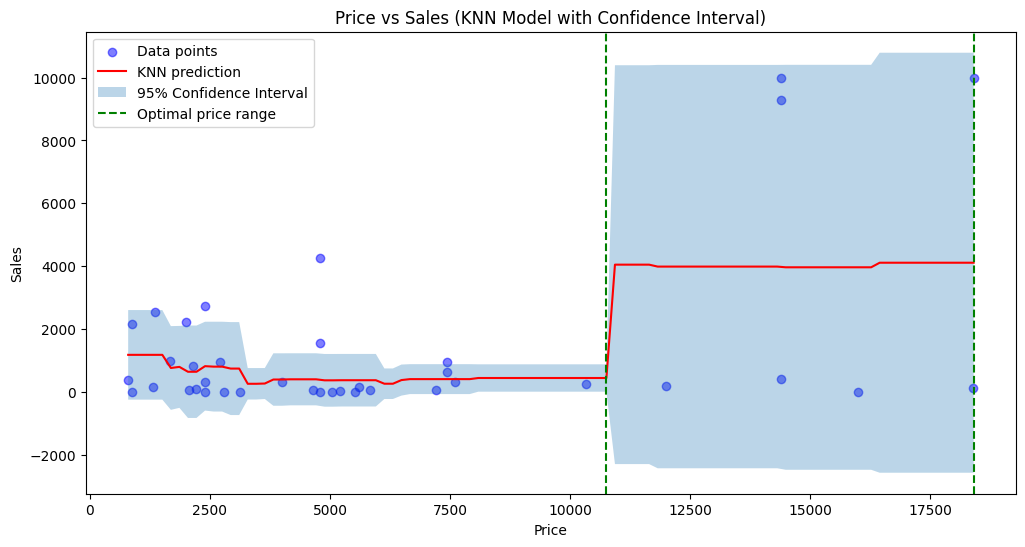

Mean Squared Error: 4232153.25
R-squared Score: -1.0868251405124378


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats

# Assuming df is your DataFrame with 'sales' and 'price' columns
sales = np.array(d_f["sales"])
prices = np.array(d_f["price"])

# Reshape the data
X = prices.reshape(-1, 1)  # Price is now the feature
y = sales  # Sales is now the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the KNN model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Function to predict demand with confidence interval
def predict_demand_with_ci(price, confidence=0.95):
    scaled_price = scaler.transform([[price]])
    neighbors = model.kneighbors(scaled_price)[1][0]
    neighbor_demands = y_train[neighbors]

    mean_demand = np.mean(neighbor_demands)
    std_error = stats.sem(neighbor_demands)
    ci = stats.t.interval(confidence, len(neighbor_demands)-1, loc=mean_demand, scale=std_error)

    return mean_demand, ci

# Function to calculate revenue
def calculate_revenue(price, demand):
    return price * demand

# Function to optimize price range
def optimize_price_range(price_range, confidence=0.95):
    revenues = []
    for price in price_range:
        mean_demand, (lower_ci, upper_ci) = predict_demand_with_ci(price, confidence)
        min_revenue = calculate_revenue(price, lower_ci)
        max_revenue = calculate_revenue(price, upper_ci)
        revenues.append((price, min_revenue, max_revenue))

    revenues = np.array(revenues)
    best_worst_case = revenues[np.argmax(revenues[:, 1])]
    best_best_case = revenues[np.argmax(revenues[:, 2])]

    return best_worst_case[0], best_best_case[0]

# Generate a range of prices to test
min_price, max_price = prices.min(), prices.max()
price_range = np.linspace(min_price, max_price, 100)

# Find optimal price range
lower_optimal, upper_optimal = optimize_price_range(price_range)

print(f"Optimal price range: ${lower_optimal:.2f} to ${upper_optimal:.2f}")

# Plotting the data and model predictions
plt.figure(figsize=(12, 6))
plt.scatter(prices, sales, color='blue', label='Data points', alpha=0.5)

# Generate points for the prediction line and confidence interval
X_plot = np.linspace(min_price, max_price, 100).reshape(-1, 1)
y_mean = []
y_lower = []
y_upper = []

for price in X_plot:
    mean, (lower, upper) = predict_demand_with_ci(price[0])
    y_mean.append(mean)
    y_lower.append(lower)
    y_upper.append(upper)

plt.plot(X_plot, y_mean, color='red', label='KNN prediction')
plt.fill_between(X_plot.ravel(), y_lower, y_upper, alpha=0.3, label='95% Confidence Interval')
plt.axvline(x=lower_optimal, color='green', linestyle='--', label='Optimal price range')
plt.axvline(x=upper_optimal, color='green', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Price vs Sales (KNN Model with Confidence Interval)')
plt.legend()
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Certainly! I'll explain the code in very simple terms, as if you're a 5-year-old:

Imagine you have a lemonade stand, and you want to know how much to charge for your lemonade to make the most money.

1. First, we look at how many cups of lemonade you sold in the past and how much you charged for each cup. This is like looking at your lemonade stand's diary.

2. We then use a special tool (the computer program) that's like a smart friend who can remember all this information about your lemonade sales.

3. This smart friend looks at the prices you charged before and how many cups you sold at those prices. It's like connecting dots between price and sales.

4. Now, when we want to know how many cups we might sell at a new price, we ask our smart friend. The friend looks at the closest "dots" (past sales) and makes a guess.

5. But sometimes our friend isn't sure, so it gives us a range instead of just one number. It's like saying "You'll probably sell between 10 and 15 cups" instead of just "You'll sell 12 cups."

6. We then use this information to find the best price range for your lemonade. We do this by pretending to sell lemonade at lots of different prices and seeing which ones might make the most money.

7. Finally, we draw a picture (a graph) that shows all of this information. The blue dots are your past sales, the red line is what our smart friend thinks might happen at different prices, and the green lines show the best prices to charge.

8. We also check how good our smart friend is at guessing by comparing its guesses to what really happened in some of your past sales.

So, in the end, this program is like having a very smart friend who looks at all your past lemonade sales and helps you decide how much to charge to make the most money, while also telling you it's okay if you don't sell exactly that amount every time.


In [ ]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
res=requests.get("https://cleartax.in/s/average-salary-in-india")
soup=BeautifulSoup(res.content,'html.parser')
table=soup.find_all('figure',class_="table")

In [ ]:
table_data=[i.get_text() for i in table[0].find('tbody').find_all('tr')]

In [ ]:
sal_dict=dict()
for i in range(len(table_data)):
  if "Rs." in table_data[i]:
    sal_dict[12*int(table_data[i].split("Rs.")[1].replace(",",""))]=table_data[i].split("Rs.")[0]
sal_dict

{248760: 'Uttar Pradesh',
 242520: 'West Bengal',
 241320: 'Maharashtra',
 239520: 'Bihar',
 236880: 'Madhya Pradesh',
 235200: 'Tamil Nadu',
 229800: 'Karnataka',
 226560: 'Gujarat',
 225480: 'Orissa',
 222240: 'Andhra Pradesh',
 221160: 'Jharkhand',
 219480: 'Kerala',
 217440: 'Punjab',
 214320: 'Assam',
 210840: 'Chattisgarh',
 207960: 'Haryana',
 205680: 'Uttranchal',
 205200: 'Delhi',
 204120: 'Jammu and Kashmir',
 201120: 'Tripura',
 199680: 'Himachal Pradesh',
 197040: 'Manipur',
 195120: 'Meghalaya',
 193440: 'Nagaland',
 187440: 'Pondicherry',
 187080: 'Arunachal Pradesh',
 186480: 'Goa',
 184680: 'Mizoram',
 181560: 'Sikkim',
 179280: 'Chandigarh',
 175560: 'Dadra and Nagar Haveli',
 172200: 'Andaman and Nicobar Islands',
 171480: 'Daman and Diu',
 171120: 'Lakshadweep'}

In [ ]:
table_data_age=[i.get_text() for i in table[1].find('tbody').find_all('tr')]
table_data_age

['Age Range\xa010%75%90%\xa0Average Salary',
 'Below 24 years\xa0Rs. 3,900-Rs. 11,937\xa0Rs. 5,905',
 'Between 25 to 34 yearsRs. 3,900Rs. 14,400Rs. 25,181Rs. 10,780',
 'Between 35 to 44 yearsRs. 3,900Rs. 18,444Rs. 33,639Rs. 13,777',
 'Between 45 to 54 years\xa0Rs. 3,900Rs. 15,971Rs. 30,678Rs. 11,932',
 'Above 55 years\xa0Rs. 3,900Rs. 13,871Rs. 25,002Rs. 10,365']

In [ ]:
age_sal_dict=dict()
for i in range(len(table_data_age)):
  if "Rs." in table_data_age[i]:
    age_sal_dict[table_data_age[i].split("Rs.")[0]]=table_data_age[i].split("Rs.")[1:]
age_sal_dict

{'Below 24 years\xa0': [' 3,900-', ' 11,937\xa0', ' 5,905'],
 'Between 25 to 34 years': [' 3,900', ' 14,400', ' 25,181', ' 10,780'],
 'Between 35 to 44 years': [' 3,900', ' 18,444', ' 33,639', ' 13,777'],
 'Between 45 to 54 years\xa0': [' 3,900', ' 15,971', ' 30,678', ' 11,932'],
 'Above 55 years\xa0': [' 3,900', ' 13,871', ' 25,002', ' 10,365']}

In [ ]:
table_data_gender=[i.get_text() for i in table[2].find('tbody').find_all('tr')]
table_data_gender

['Gender\xa0Average Salary Per Year\xa0',
 'MaleRs. 1,953,055',
 'FemaleRs. 1,516,296']

In [ ]:
gender_sal_dict=dict()
for i in range(len(table_data_gender)):
  if "Rs." in table_data_gender[i]:
    gender_sal_dict[table_data_gender[i].split("Rs.")[0]]=int(table_data_gender[i].split("Rs.")[1].replace(",",""))
gender_sal_dict


{'Male': 1953055, 'Female': 1516296}

In [ ]:
!pip install -q langchain_groq langchain youtube-transcript-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.3/377.3 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.5 MB/s eta 0:00:00


In [ ]:
from langchain_groq import ChatGroq

chat = ChatGroq(
    temperature=0,
    model="llama3-70b-8192",
    api_key="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" # Optional if not set as an environment variable
)

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi
video_id="kqDQQJ32B_U"
yt_script=YouTubeTranscriptApi.get_transcript(video_id)

In [ ]:
txt=" ".join([i["text"] for i in yt_script])

In [ ]:
txt

'Hello and welcome to this Walmart Seller Academy tutorial for the Listing Quality and Rewards Dashboard on Walmart Marketplace. In this video, we\'ll discuss how Walmart Marketplace listing quality is measured. We will also look at the Listing Quality and Rewards dashboard and the in-depth insights of the Item Details page in Seller Center. Lastly, we will explore the Bulk Attribute Editor, a useful feature that helps you improve the listing quality for many of your items all at once. Ongoing listing optimization is crucial to selling successfully on Walmart.com. Listing improvements may increase product discoverability in search and browse results and help customers make better informed purchasing decisions. Plus, Listing Quality is one of the factors contributing to your Pro Seller Badge status. But where do you start when you need to optimize your listings? At Walmart, we measure the Listing Quality Score to take the guesswork out of the optimization process. This holistic score pr

In [ ]:
res=chat.invoke(f"This is a product description convert it into Bullets format from `{txt}`")

In [ ]:
print(res.content)

Here is the product description in bullet points format:

**Walmart Seller Academy Tutorial: Listing Quality and Rewards Dashboard**

**Introduction**

* Learn how Walmart Marketplace listing quality is measured
* Explore the Listing Quality and Rewards dashboard
* Discover the Bulk Attribute Editor feature

**Why Listing Quality Matters**

* Ongoing listing optimization is crucial for selling successfully on Walmart.com
* Listing improvements increase product discoverability in search and browse results
* Helps customers make better informed purchasing decisions
* Contributes to Pro Seller Badge status

**Listing Quality Score**

* A holistic score that measures the strength of Content & Discoverability, Offer, and Ratings & Reviews factors
* Provided at the catalog and item level
* Helps identify areas for improvement

**Listing Quality and Rewards Dashboard**

* Accessible in Seller Center under "Growth Opportunities" in Analytics
* Features:
	+ Progress toward earning the Pro Selle